### approaching categorical variables

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [5]:
df_train = pd.read_csv("./datasets/cat_in_the_dat/train.csv", index_col=0)
df_train

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,Theremin,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,Oboe,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,Theremin,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0


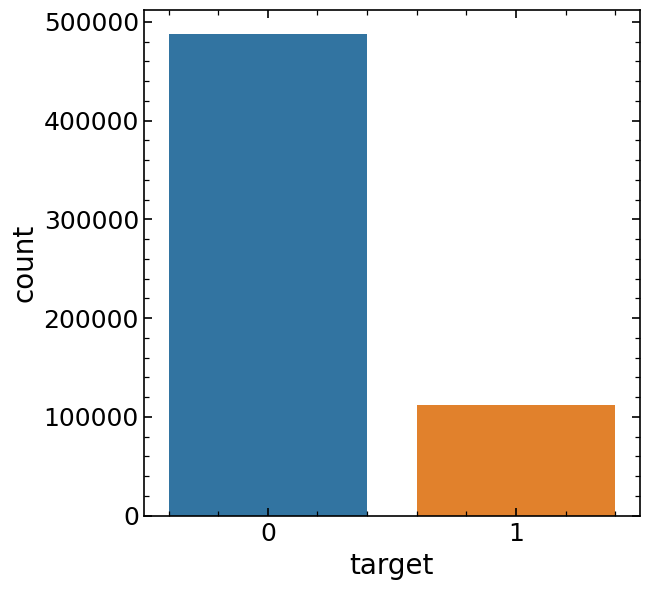

In [7]:
sns.countplot(data=df_train, x="target")

In [9]:
[i for i in df_train.columns if i.split("_")[-1]=="1"]

['bin_1', 'nom_1', 'ord_1']

In [13]:
df_train["ord_2"].value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [15]:
mapping = dict(zip(df_train["ord_2"].value_counts().index, range(6)))
mapping

{'Freezing': 0,
 'Warm': 1,
 'Cold': 2,
 'Boiling Hot': 3,
 'Hot': 4,
 'Lava Hot': 5}

In [18]:
# label encoding

df_train.loc[:, "ord_2"] = df_train.ord_2.map(mapping)
df_train.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

In [19]:
from sklearn import  preprocessing

df = pd.read_csv("./datasets/cat_in_the_dat/train.csv", index_col=0)
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")
print(df.ord_2.value_counts())

lbl_enc = preprocessing.LabelEncoder()
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64


2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: ord_2, dtype: int64

In [21]:
example = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 1]
])
example.nbytes

72

In [24]:
# binarization

from scipy import  sparse

sparse_example = sparse.csr_matrix(example)
print(sparse_example)
sparse_example.data.nbytes

  (0, 2)	1
  (1, 0)	1
  (2, 0)	1
  (2, 2)	1


32

In [25]:
sparse_example.data.nbytes + sparse_example.indptr.nbytes + sparse_example.indices.nbytes

64

In [27]:
# test with large sparse example

n_rows = 1000
n_cols = 10000

example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))
print(f"size of dense array: {example.nbytes}")

sparse_example = sparse.csr_matrix(example)
print(f"size of sparse array: {sparse_example.data.nbytes}")

full_size = (
    sparse_example.data.nbytes + 
    sparse_example.indptr.nbytes + 
    sparse_example.indices.nbytes
)
print(f"full size of sparse array: {full_size}")

size of dense array: 80000000
size of sparse array: 3996784
full size of sparse array: 5999180


In [28]:
# one-hot encoding

example = np.array(
    [
        [0,0,0,0,1,0],
        [0,1,0,0,0,0],
        [1,0,0,0,0,0]
    ]
)
print(f"size of dense array: {example.nbytes}")

sparse_example = sparse.csr_matrix(example)
print(f"size of sparse array: {sparse_example.data.nbytes}")

full_size = (
    sparse_example.data.nbytes + 
    sparse_example.indptr.nbytes + 
    sparse_example.indices.nbytes
)
print(f"full size of sparse array: {full_size}")

size of dense array: 144
size of sparse array: 24
full size of sparse array: 52


In [31]:
# test on larger dataset with one-hot-encoding

example = np.random.randint(1000, size=100000)

ohe = preprocessing.OneHotEncoder(sparse=False)
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
print(f"size of dense array: {ohe_example.nbytes}")

ohe = preprocessing.OneHotEncoder(sparse=True)
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
print(f"size of sparse array: {ohe_example.data.nbytes}")

full_size = (
    ohe_example.data.nbytes + 
    ohe_example.indptr.nbytes + 
    ohe_example.indices.nbytes
)
print(f"full size of sparse array: {full_size}")

size of dense array: 800000000
size of sparse array: 800000
full size of sparse array: 1600004


#### categorical representation
1. numerical order
2. binarization
3. one-hot-encoder 

##### key: use sparse array to save memory

In [35]:
df = pd.read_csv("./datasets/cat_in_the_dat/train.csv")

df[df.ord_2 == "Boiling Hot"].shape

(84790, 25)

In [36]:
df.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

In [37]:
df.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

In [38]:
df.groupby(
    [
        "ord_1",
        "ord_2"
    ]
)["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


In [39]:
df["new_feature"] = df.ord_1.astype(str) + "_" + df.ord_2.astype(str)
df.new_feature

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

In [40]:
df.new_feature.value_counts()

Novice_Freezing            38233
Novice_Warm                33263
Expert_Freezing            33249
Expert_Warm                28900
Novice_Cold                26271
Contributor_Freezing       26082
Expert_Cold                22956
Grandmaster_Freezing       22818
Contributor_Warm           22774
Novice_Boiling Hot         22718
Grandmaster_Warm           19899
Expert_Boiling Hot         19477
Master_Freezing            18035
Novice_Hot                 17850
Contributor_Cold           17734
Novice_Lava Hot            17373
Expert_Hot                 15792
Master_Warm                15734
Contributor_Boiling Hot    15634
Grandmaster_Cold           15464
Expert_Lava Hot            15078
Grandmaster_Boiling Hot    13623
Contributor_Hot            12428
Master_Cold                12364
Contributor_Lava Hot       11919
Grandmaster_Hot            10805
Master_Boiling Hot         10800
Grandmaster_Lava Hot       10363
Master_Hot                  8594
Master_Lava Hot             8209
Novice_nan

In [41]:
df["new_feature"] = df.ord_1.astype(str) + "_" + df.ord_2.astype(str) + "_" + df.ord_3.astype(str)
df.new_feature

0                 Contributor_Hot_c
1                Grandmaster_Warm_e
2                    nan_Freezing_n
3                 Novice_Lava Hot_a
4                Grandmaster_Cold_h
                    ...            
599995            Novice_Freezing_a
599996         Novice_Boiling Hot_n
599997       Contributor_Freezing_n
599998                Master_Warm_m
599999    Contributor_Boiling Hot_b
Name: new_feature, Length: 600000, dtype: object

#### steps to deal with categorical variables
1. fill NAN with "NONE" (treat NaN as a new category)
2. convert text to number by $LabelEncoder$
3. create one-hot-encoding (sparse matrix)

In [42]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [43]:
df.ord_2.fillna("NONE").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

In [44]:
# training and test datasets concatenation

train = pd.read_csv("./datasets/cat_in_the_dat/train.csv")
test = pd.read_csv("./datasets/cat_in_the_dat/test.csv")

test.loc[:, "target"] = -1
train.shape, test.shape

((600000, 25), (400000, 25))

In [45]:
data = pd.concat([train, test]).reset_index(drop=True)
print(data.shape)

features = [x for x in train.columns if x not in ["id", "target"]]
print(features)

(1000000, 25)
['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month']


In [46]:
for feat in features:
    lbc_enc = preprocessing.LabelEncoder()
    tmp_col = data[feat].fillna("NONE").astype(str).values
    data.loc[:, feat] = lbl_enc.fit_transform(tmp_col)

condition = data.target != -1
train = data[condition].reset_index(drop=True)
test = data[condition].reset_index(drop=True)
data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0,0,3,5,3,6,...,27,2,0,3,3,21,57,5,5,0
1,1,1,1,0,0,2,3,4,0,5,...,2113,2,2,6,5,24,151,6,9,0
2,2,0,1,0,0,0,3,1,3,0,...,1400,2,4,2,14,16,106,4,11,0
3,3,2,0,0,0,0,3,0,3,3,...,2168,0,5,4,1,2,46,2,5,0
4,4,0,2,0,2,0,3,6,3,2,...,1748,2,2,1,8,2,51,4,3,0


In [49]:
df.ord_4.fillna("NONE").value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

In [50]:
# create rare value based on count threshold

test_df = df.copy()
test_df.ord_4 = test_df.ord_4.fillna("NONE")
condition = test_df.ord_4.value_counts()[test_df["ord_4"]].values < 2000
test_df.loc[condition, "ord_4"] = "RARE"
test_df.ord_4.value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64